# Projet d'Analyse de données massives
Naila Bouterfa - M1 IMSV

Données : Transactions d'horodateurs Parisiens durant l'année 2014

Nous allons dans un premier temps importer les modules qui nous seront utiles pour la suite et effectuerons la connexion au serveur contenant les données sur MongoDB sous differentes collections

In [8]:
import pymongo
import pandas
from pprint import pprint
import seaborn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

con = pymongo.MongoClient("mongodb://193.51.82.104:2343/")


horo = con.horodateurs
mob = horo.mobiliers

horo.collection_names()

['transactions', 'transactions_small', 'myresults', 'mobiliers']

# I - Premieres explorations de données



## La collection : Mobiliers

Nombre de documents dans la collection Mobiliers

In [2]:
horo.mobiliers.count()

7810

Structure des documents de la collection Mobiliers

In [3]:
pprint(horo.mobiliers.find_one())

{'_id': ObjectId('56eaa4552d7eb34e4432e0fb'),
 'datasetid': 'horodateurs-mobiliers',
 'fields': {'adresse': '48 vis-à-vis RUE DE LISBONNE',
            'alim': 'SOLAIRE',
            'arrondt': 8,
            'geo_point_2d': [48.877489999731374, 2.311394999713242],
            'geo_shape': {'coordinates': [2.311394999713242,
                                          48.877489999731374],
                          'type': 'Point'},
            'modele': 'SAB3',
            'numhoro': 57080603,
            'objectid': 4383,
            'regime': 'MIX',
            'tarif': '4,00 E MIX 2U',
            'tarifhor': 4.0,
            'zoneres': '8J'},
 'geometry': {'coordinates': [2.311394999713242, 48.877489999731374],
              'type': 'Point'},
 'record_timestamp': '2015-12-02T17:49:46+00:00',
 'recordid': '698c75a21ba4f4c34e72f32ea1ecd94f9de8b88c'}


Les différents types d'alimentation possible et le nombre d'horodateur associé :


In [8]:
res = list(horo.mobiliers.aggregate([
    { "$group" : { "_id" : "$fields.alim", "nb" : { "$sum" : 1}}}
]))
df = pandas.DataFrame(res) 
df.columns = ["Alimentation", "Effectif"]
df

,Alimentation,Effectif
0,None,8
1,PILE,2994
2,SOLAIRE,4808


Nombre de mobilier pour chaque arrondissement :

In [4]:
res = list(horo.mobiliers.aggregate([
    { "$group" : { "_id" : "$fields.arrondt", "nb" : { "$sum" : 1}}},
    { "$sort" : { "_id": 1}}
]))
df = pandas.DataFrame(res) 
df.columns = ["Arrondissement", "Effectif"]
df

,Arrondissement,Effectif
0,1,87
1,2,67
2,3,133
3,4,135
4,5,267
5,6,174
6,7,361
7,8,376
8,9,227
9,10,197


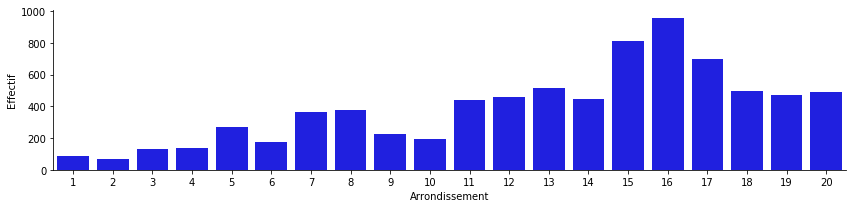

In [6]:
seaborn.factorplot(x = "Arrondissement", y = "Effectif", color = "blue",
                   data = df, kind = "bar", size = 3, aspect = 4)

Effectifs par modeles existants :

In [39]:
res = list(horo.mobiliers.aggregate([
    { "$group" : { "_id" : "$fields.modele", "nb" : { "$sum" : 1}}},
    { "$sort" : { "nb": -1}}
]))
df = pandas.DataFrame(res) 
df.columns = ["Modèle", "Effectif"]
df

,Modèle,Effectif
0,SAB3,4811
1,SMB2,2995
2,MUI,3
3,None,1


Regime vs arrondissement :

In [7]:
res = list(horo.mobiliers.aggregate([
    { "$group" : { "_id" : { "reg" : "$fields.regime", "arr" : "$fields.arrondt"}, "nb" : { "$sum" : 1}}},
    { "$project": { "regime" : "$_id.reg", "arrondissement" : "$_id.arr", "effectif" : "$nb" }},
    { "$sort" : { "arrondissement" : 1}}
]))
df = pandas.DataFrame(res).drop("_id", 1)
df

,arrondissement,effectif,regime
0,1,24,ROT
1,1,63,MIX
2,2,18,ROT
3,2,49,MIX
4,3,82,MIX
5,3,51,ROT
6,4,17,ROT
7,4,118,MIX
8,5,26,ROT
9,5,241,MIX


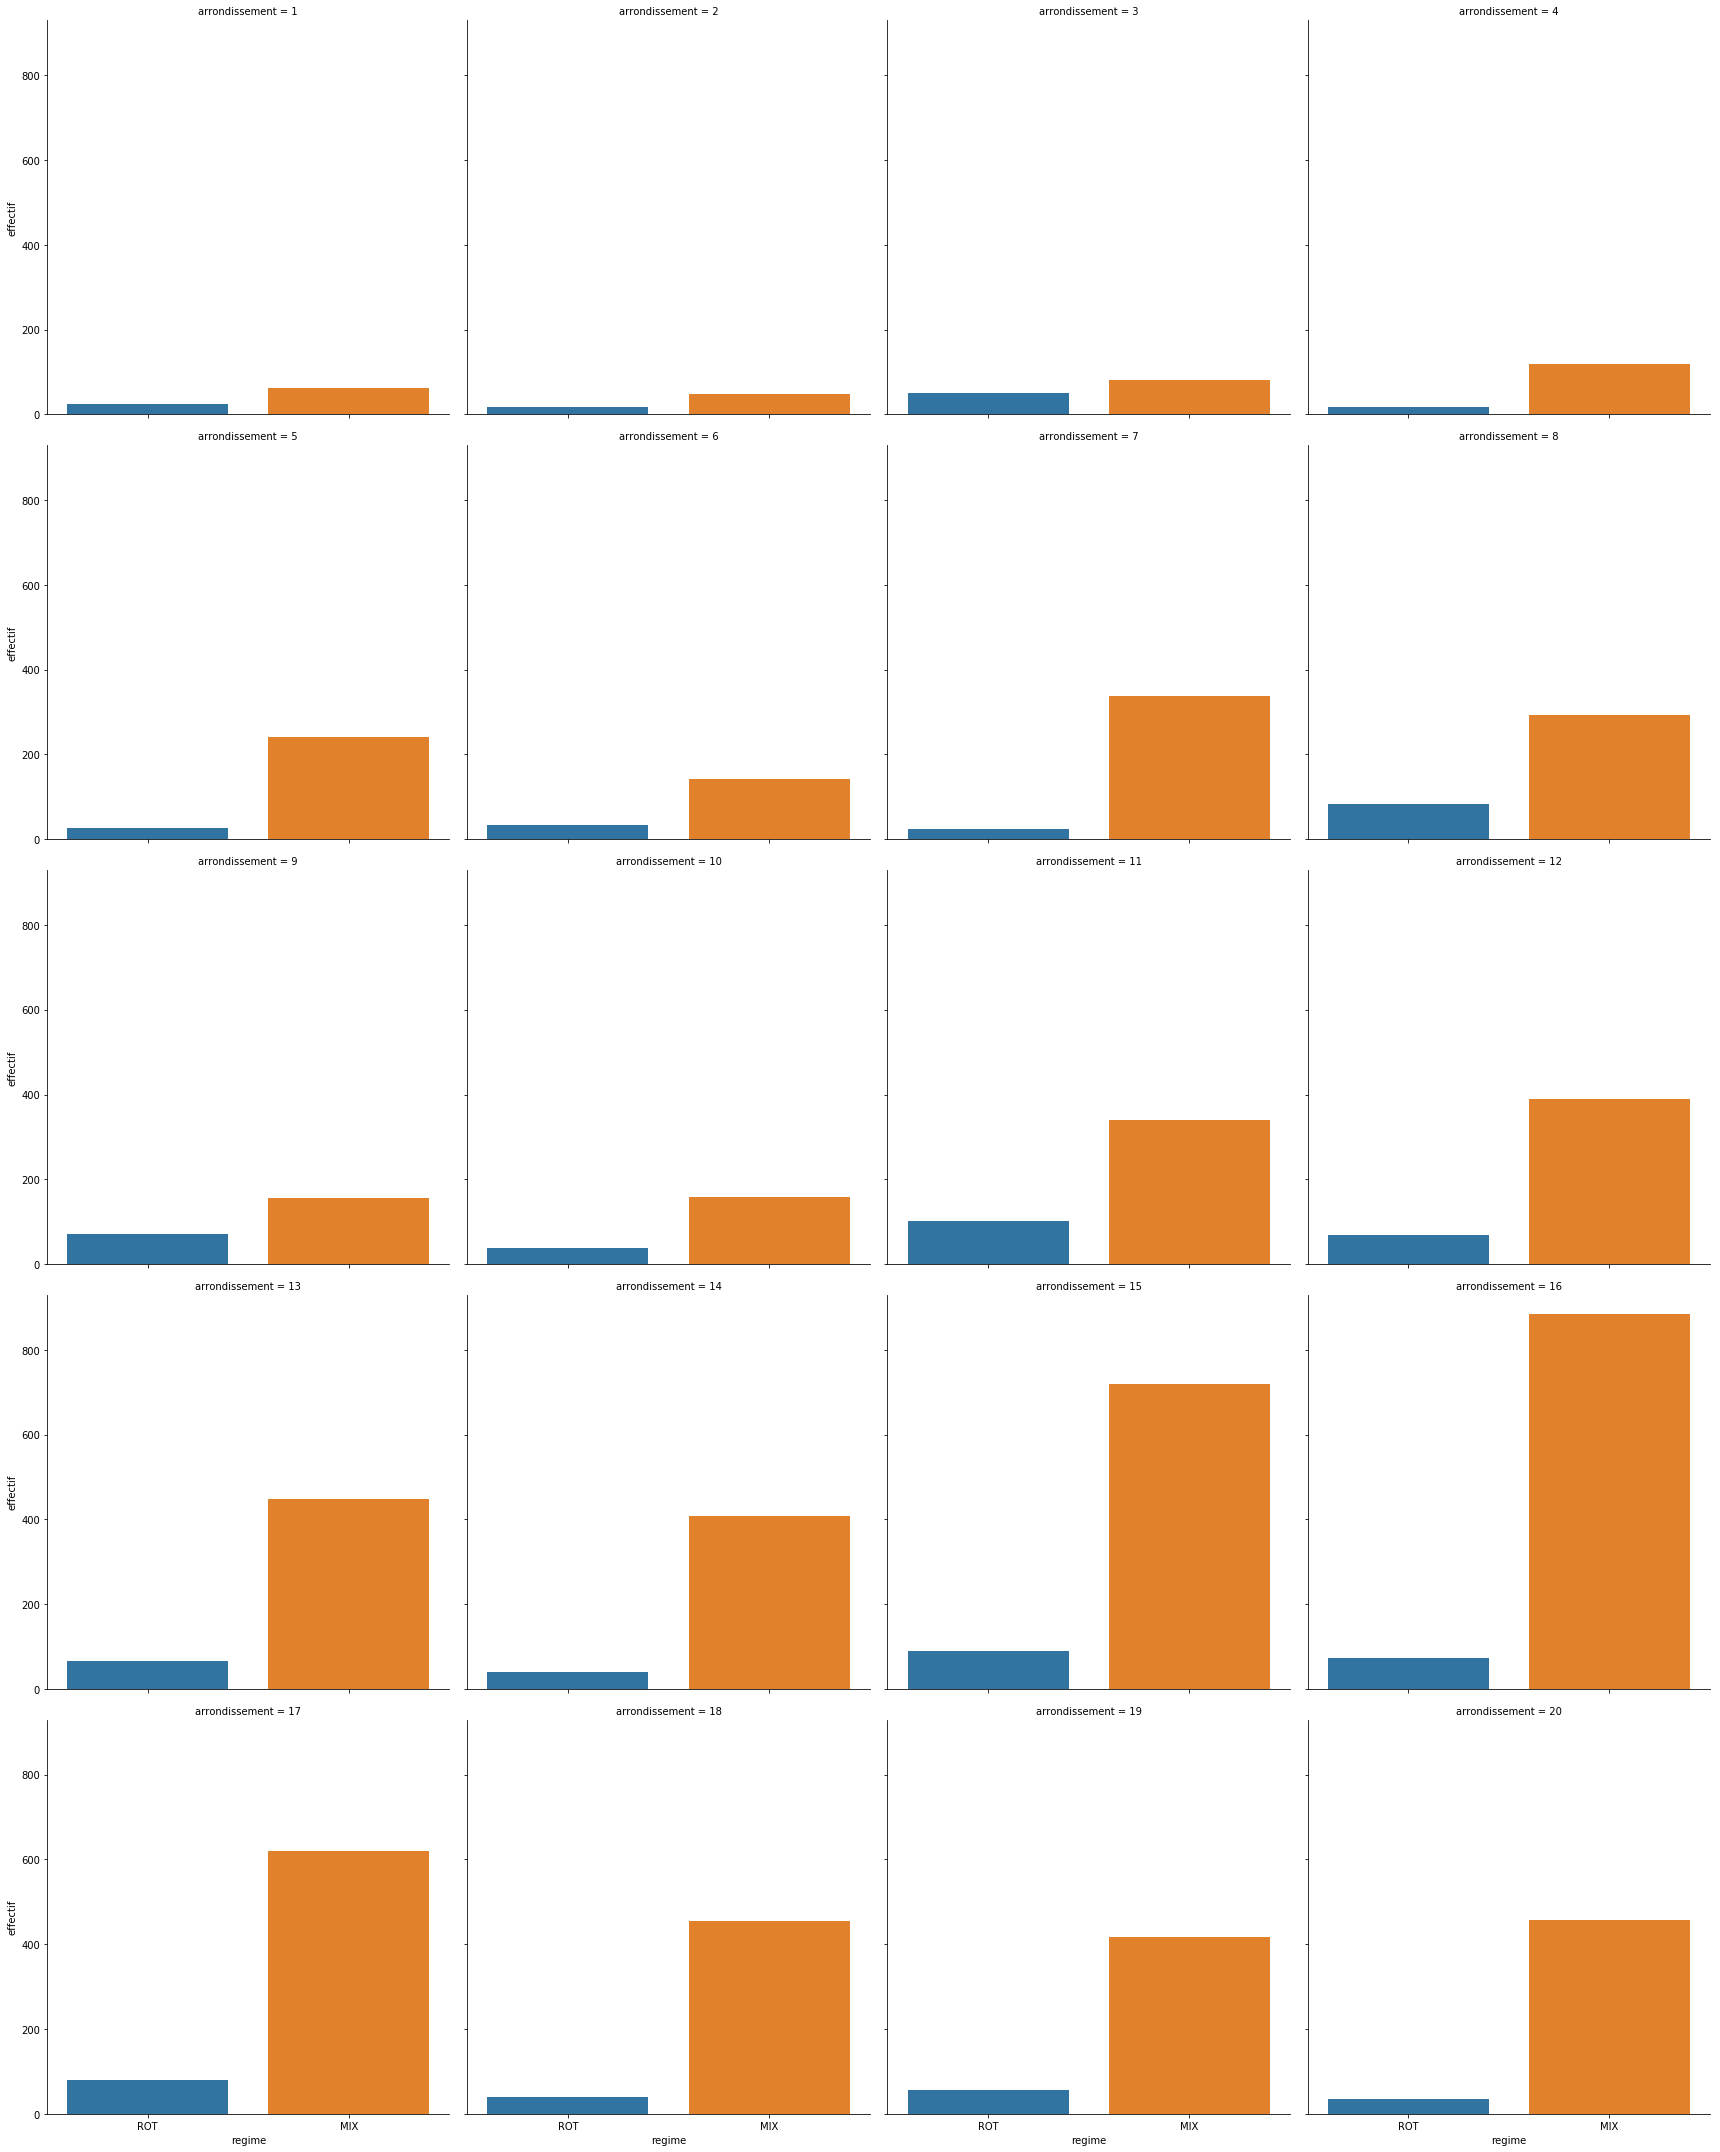

In [13]:
seaborn.factorplot(x = "regime", y = "effectif",
                   col = "arrondissement", col_wrap = 4,
                   data = df, kind = "bar", size = 6)


Tarif horaire vs arrondissement :

In [15]:
res = list(horo.mobiliers.aggregate([
    { "$group" : { "_id" : { "tar" : "$fields.tarifhor", "arr" : "$fields.arrondt"}, "nb" : { "$sum" : 1}}},
    { "$project": { "tarif" : "$_id.tar", "arrondissement" : "$_id.arr", "effectif" : "$nb" }},
    { "$sort" : { "arrondissement" : 1}}
]))
df = pandas.DataFrame(res).drop("_id", 1)
df

,arrondissement,effectif,tarif
0,1,87,4.0
1,2,67,4.0
2,3,133,4.0
3,4,135,4.0
4,5,267,4.0
5,6,174,4.0
6,7,361,4.0
7,8,376,4.0
8,9,227,4.0
9,10,197,4.0


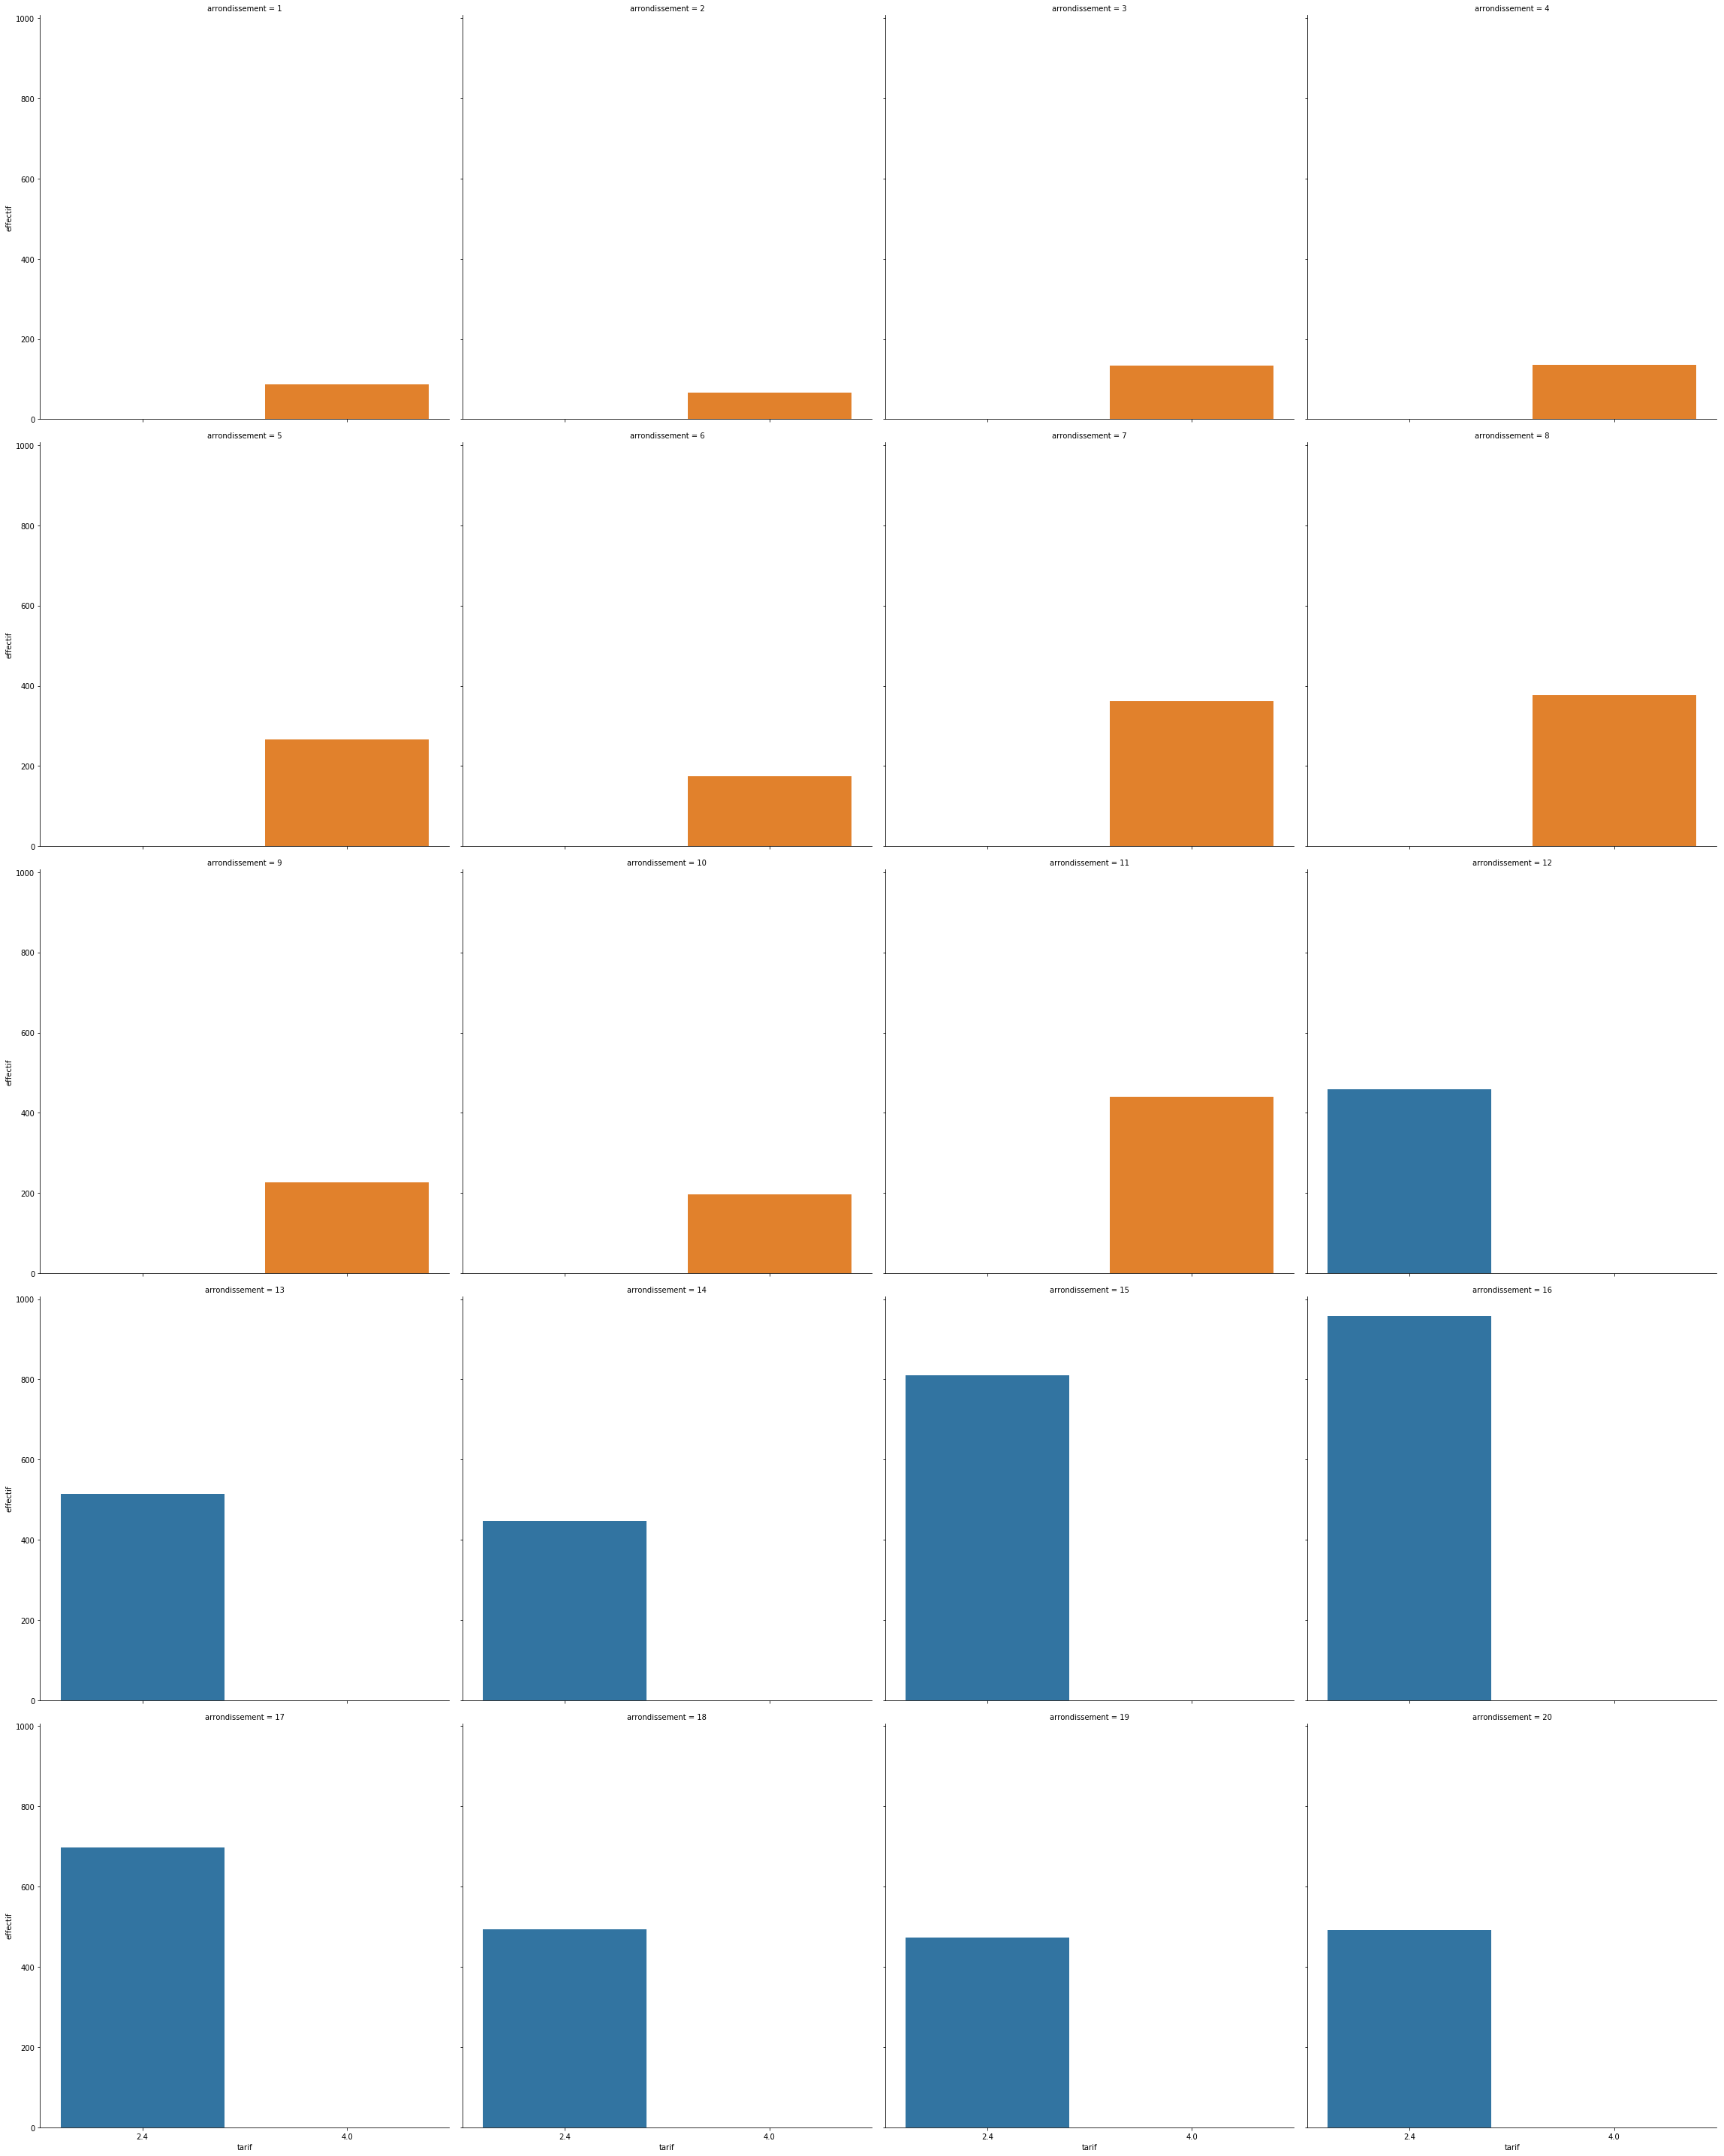

In [16]:
seaborn.factorplot(x = "tarif", y = "effectif",
                   col = "arrondissement", col_wrap =4,
                   data = df, kind = "bar", size = 8)

## La collection : Transactions

Nombre de documents dans la collection Transactions

In [11]:
horo.transactions.count()

24448030

In [17]:
horo.transactions_small.count()

244480

Structure des documents de la collection Transactions

In [12]:
pprint(horo.transactions.find_one())

{'_id': ObjectId('56eaa8279fae0d71f77ea2bd'),
 'date horodateur': datetime.datetime(2014, 1, 9, 14, 9, 47),
 'durée payée (h)': 0.5,
 'début stationnement': datetime.datetime(2014, 1, 9, 14, 9, 47),
 'fin stationnement': datetime.datetime(2014, 1, 9, 14, 39, 47),
 'horodateur': 1050,
 'montant carte': 1.8,
 'moyen de paiement': 'Paris Carte',
 'usager': 'Rotatif'}


Distribution des montants payés et des durées payées 

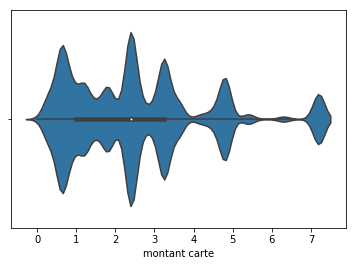

In [17]:
res = list(horo.transactions_small.find({}, {"_id": 0, "montant carte" : 1}))
df = pandas.DataFrame(res)
seaborn.violinplot(x = "montant carte", data = df)

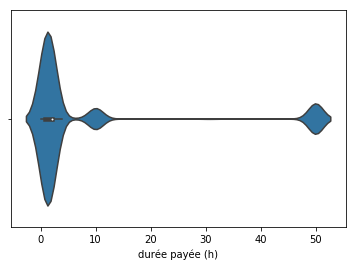

In [18]:
res = list(horo.transactions_small.find({}, {"_id": 0, "durée payée (h)" : 1}))
df = pandas.DataFrame(res)
seaborn.violinplot(x = "durée payée (h)", data = df)

Les différents moyens de paiements utilisés par ordre décroissant du nombre de paiements

In [20]:
res = list(horo.transactions.aggregate([
    { "$group" : { "_id" : "$moyen de paiement", "nb" : { "$sum" : 1}}},
    { "$sort" : { "nb" : -1 }}
]))
pprint(pandas.DataFrame(res))

           _id        nb
0  Paris Carte  13181015
1           CB  11267015


Le type d'usager par ordre décroissant du nombre de paiements

In [18]:
res = list(horo.transactions.aggregate([
    { "$group" : { "_id" : "$usager", "nb" : { "$sum" : 1}}},
    { "$sort" : { "nb" : -1 }}
]))
pprint(pandas.DataFrame(res))

        _id        nb
0   Rotatif  19033897
1  Résident   5414133


### Evolution globale du montant total des transactions au cours de l'année 

In [ ]:
res = list(horo.transactions_small.aggregate([
    { "$group" : { "_id" : "$date horodateur", "nb" : { "$sum" : "$montant carte" } } },
    { "$project" : { "Date" : "$_id", "Montant total" : "$nb" } },
    { "$sort" : {"Date" : 1} }
]))

df = pandas.DataFrame(res).drop("_id",1).round(2)
df

# II - Analyse sur les collections Mobilier et Transaction

## Nombre de transactions par arrondissement

In [ ]:
res = list(horo.mobiliers.aggregate([
#    { "$limit" : 100 },
    { "$lookup": {
        "from": "transactions_small",
        "localField": "fields.numhoro",
        "foreignField": "horodateur",
        "as": "transactions"
    }},
    { "$project" : { "Arrondissement" : "$fields.arrondt", "Nb" : { "$size" : "$transactions" }, "_id" : 0}},
    { "$group" : { "_id" : "$Arrondissement", "nb" : { "$sum" : "$Nb" }}}
]))

df = pandas.DataFrame(res)
df.columns = [ "Arrondissement", "NbTransactions"]
df = df.sort_values(by = "Arrondissement").reset_index()
df

In [ ]:
seaborn.factorplot(x = "Arrondissement", y = "NbTransactions",
                   data = df, kind = "bar", size = 4, aspect = 3)

## Répartition du type d'alimentation par arrondissement

In [ ]:
res = list(horo.mobiliers.aggregate([
    { "$lookup": {
        "from": "transactions_small",
        "localField": "fields.numhoro",
        "foreignField": "horodateur",
        "as": "transactions"
    }},
    { "$unwind" : "$transactions" },
#    { "$limit" : 10000},
    { "$group" : { "_id" : { "arrondissement" : "$fields.arrondt", "type" : "$fields.alim" }, "nb" : { "$sum" : 1 }}},
    { "$match" : { "_id.type" : {"$exists" : True }}}
]))

df = pandas.DataFrame(res)
df = df.assign(
    Arrondissement = [a['arrondissement'] for a in df._id],
    Alimentation = [a['type'] for a in df._id]
).drop("_id", 1)
df

In [ ]:
seaborn.factorplot(x = "Alimentation", y = "nb",
                   col = "Arrondissement", col_wrap = 10,
                   data = df, kind = "bar", size = 6)

## Montant total de transactions par arrondissement

In [27]:
res = list(horo.mobiliers.aggregate([
    { "$limit" : 500 },
    { "$lookup" : { 
        "from": "transactions_small",
        "localField": "fields.numhoro",
        "foreignField": "horodateur",
        "as": "transaction"
    } },
    { "$unwind" : "$transaction" },
    { "$group" : { "_id" : "$fields.arrondt", "nb" : { "$sum" : "$transaction.montant carte" } } },
    { "$project" : { "Arrondissement" : "$_id", "Montant total" : "$nb" } },
    { "$sort" : {"Montant total" : -1} }
]))

df = pandas.DataFrame(res).drop("_id",1)
df

,Arrondissement,Montant total
0,8,4949.10
1,16,4355.88
2,5,3409.84
3,17,3121.49
4,13,2802.65
5,15,2510.94
6,9,2393.32
7,11,2309.31
8,12,2063.85
9,6,2058.05


In [ ]:
seaborn.factorplot(x = "Arrondissement", y = "Montant total",
                   data = df, kind = "bar", size = 4, aspect = 3)

## Montant moyen de transactions par arrondissement

In [64]:
res = list(horo.mobiliers.aggregate([
    { "$limit" : 500 },
    { "$lookup" : { 
        "from": "transactions_small",
        "localField": "fields.numhoro",
        "foreignField": "horodateur",
        "as": "transaction"
    } },
    { "$unwind" : "$transaction" },
    { "$group" : { "_id" : "$fields.arrondt", "nb" : { "$avg" : "$transaction.montant carte" } } },
    { "$project" : { "Arrondissement" : "$_id", "Montant moyen" : "$nb" } },
    { "$sort" : {"Montant moyen" : -1} }
]))

df = pandas.DataFrame(res).drop("_id",1).round(2)
df

,Arrondissement,Montant moyen
0,1,4.60
1,3,4.44
2,2,4.15
3,8,3.89
4,6,3.85
5,7,3.82
6,5,3.76
7,4,3.49
8,9,3.10
9,11,2.84


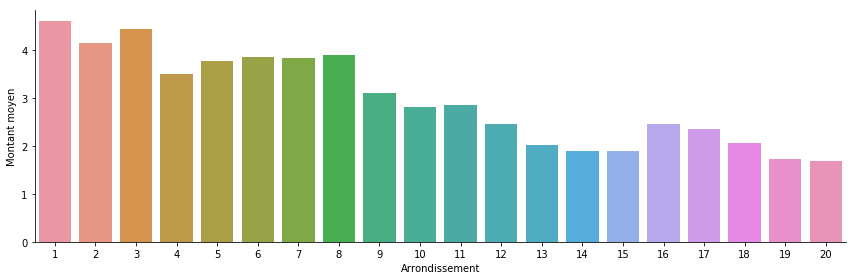

In [65]:
seaborn.factorplot(x = "Arrondissement", y = "Montant moyen",
                   data = df, kind = "bar", size = 4, aspect = 3)

## Durée totale de transactions par arrondissement

In [ ]:
res = list(horo.mobiliers.aggregate([
    { "$limit" : 500 },
    { "$lookup" : { 
        "from": "transactions_small",
        "localField": "fields.numhoro",
        "foreignField": "horodateur",
        "as": "transaction"
    } },
    { "$unwind" : "$transaction" },
    { "$group" : { "_id" : "$fields.arrondt", "nb" : { "$sum" : "$transaction.durée payée (h)" } } },
    { "$project" : { "Arrondissement" : "$_id", "Durée totale (h)" : "$nb" } },
    { "$sort" : {"Arrondissement" : 1} }
]))

df = pandas.DataFrame(res).drop("_id",1).round(2)
df

In [ ]:
seaborn.factorplot(x = "Arrondissement", y = "Durée totale (h)",
                   data = df, kind = "bar", size = 4, aspect = 3)

## Durée moyenne des transactions par arrondissement 

In [ ]:
res = list(horo.mobiliers.aggregate([
    { "$limit" : 500 },
    { "$lookup" : { 
        "from": "transactions_small",
        "localField": "fields.numhoro",
        "foreignField": "horodateur",
        "as": "transaction"
    } },
    { "$unwind" : "$transaction" },
    { "$group" : { "_id" : "$fields.arrondt", "nb" : { "$avg" : "$transaction.durée payée (h)" } } },
    { "$project" : { "Arrondissement" : "$_id", "Durée moyenne (h)" : "$nb" } },
    { "$sort" : {"Arrondissement" : 1} }
]))

df = pandas.DataFrame(res).drop("_id",1).round(2)
df

In [ ]:
seaborn.factorplot(x = "Arrondissement", y = "Durée moyenne (h)",
                   data = df, kind = "bar", size = 4, aspect = 3)

## Evolution du montant total des transactions au cours de l'année et par arrondissement


In [ ]:
res = list(horo.mobiliers.aggregate([
    { "$match" : {"fields.arrondt" : 1} },
    { "$lookup" : {
        "from": "transactions_small",
        "localField": "fields.numhoro",
        "foreignField": "horodateur",
        "as": "transaction"
    } },
    { "$unwind" : "$transaction" },
    { "$group" : { "_id" : { "dat" : "$transaction.date horodateur", "arr" : "$fields.arrondt"}, "nb" : { "$sum" : "$transaction.montant carte" } } },
    { "$project" : { "Date" : "$_id.dat", "Arrondissement" : "$_id.arr", "Montant total" : "$nb" } },
    { "$sort" : { "Date" : 1 } }
]))

df = pandas.DataFrame(res).drop("_id",1).round(2)
res2 = pandas.DataFrame([res[i]["Date"].month for i in range(len(res))])
df2 = pandas.concat([df, res2],axis=1)
df2.columns = ["Arrondissement", "Date", "Montant total", "Mois"]

df2

# III - Cartographie

In [6]:
import folium
import json

geo = json.load(open("C:\\Users\\Yoon\\Desktop\\paris-arrondissements.geojson"))

Effectifs par arrondissement

In [9]:
res = mob.aggregate([
    { "$group" : { "_id" : "$fields.arrondt", "nb" : { "$sum" : 1}}},
    { "$sort" : { "_id": 1}}
])
df = pandas.DataFrame(list(res)) 
df.columns = ["Arrondissement", "Effectif"]
df

,Arrondissement,Effectif
0,1,87
1,2,67
2,3,133
3,4,135
4,5,267
5,6,174
6,7,361
7,8,376
8,9,227
9,10,197


In [10]:
centre = [48.86, 2.35]
carte = folium.Map(location = centre, zoom_start = 12)
carte.choropleth(geo_data = geo, key_on = "feature.properties.c_ar",
                 data = df, columns = ["Arrondissement", "Effectif"],
                 fill_color= "YlGn",
                 legend_name = "Nombre de mobiliers par quartier")
carte

### Repartition géographique des différents types de mobiliers

In [11]:
res = list(horo.mobiliers.aggregate([
#    { "$limit" : 10},
    { "$group" : { "_id" : { "Model" : "$fields.modele", "Arrondissement" : "$fields.arrondt"}, "nb" : {"$sum" : 1}}},
    { "$sort" : { "_id.Model" : 1}}
]))

df = pandas.DataFrame({
    "Model": [t["_id"]["Model"] for t in res[1:]],
    "Arrondissement" : [t["_id"]["Arrondissement"] for t in res[1:]],
    "Effectifs" : [t["nb"] for t in res[1:]]
})

df = df[["Arrondissement","Model","Effectifs"]]
df["Label"]=np.repeat([1,2,3],[len(df[df['Model']=='MUI'][['Arrondissement','Effectifs']]),len(df[df['Model']=='SAB3'][['Arrondissement','Effectifs']]),len(df[df['Model']=='SMB2'][['Arrondissement','Effectifs']])])

df

,Arrondissement,Model,Effectifs,Label
0,1,MUI,1,1
1,15,MUI,1,1
2,8,MUI,1,1
3,7,SAB3,45,2
4,5,SAB3,34,2
5,1,SAB3,86,2
6,18,SAB3,212,2
7,6,SAB3,117,2
8,9,SAB3,226,2
9,20,SAB3,491,2


Modèle MUI

In [12]:
parisMU = folium.Map(location = centre, zoom_start = 12)
parisMU.choropleth(geo_data = geo, key_on = "feature.properties.c_ar",
                 data = df[df['Model']=='MUI'][['Arrondissement','Label']], columns = ["Arrondissement","Label"],
                 fill_color="BuPu")
parisMU.save('parisMU.html')
parisMU

In [13]:
parisSA = folium.Map(location = centre, zoom_start = 12)
parisSA.choropleth(geo_data = geo, key_on = "feature.properties.c_ar",
                 data = df[df['Model']=='SAB3'][['Arrondissement','Label']], columns = ["Arrondissement","Label"],
                 fill_color="BuPu")
parisSA.save('parisSA.html')
parisSA


In [14]:
parisSM= folium.Map(location = centre , zoom_start = 12)
parisSM.choropleth(geo_data = geo, key_on = "feature.properties.c_ar",
                 data = df[df['Model']=='SMB2'][['Arrondissement','Label']], columns = ["Arrondissement","Label"],
                 fill_color="BuPu")
parisSM.save('parisSM.html')
parisSM

### Repartition des différents régimes d'horodateur

In [15]:
res = list(horo.mobiliers.aggregate([
    { "$group" : { "_id" : { "regi" : "$fields.regime", "Arrondissement" : "$fields.arrondt"}, "nb" : {"$sum" : 1}}},
    { "$sort" : { "_id.regi" : 1}}
]))
df = pandas.DataFrame({
    "regi" : [t["_id"]["regi"] for t in res[1:]],
    "Arrondissement" : [t["_id"]["Arrondissement"] for t in res[1:]],
    "Effectifs" : [t["nb"] for t in res[1:]]
})
df = df[["Arrondissement","regi","Effectifs"]]
df["Label"]=np.repeat([1,2],[len(df[df['regi']=='MIX'][['Arrondissement','Effectifs']]),len(df[df['regi']=='ROT'][['Arrondissement','Effectifs']])])
df

,Arrondissement,regi,Effectifs,Label
0,1,MIX,63,1
1,7,MIX,337,1
2,11,MIX,339,1
3,6,MIX,141,1
4,18,MIX,455,1
5,5,MIX,241,1
6,2,MIX,49,1
7,17,MIX,619,1
8,20,MIX,456,1
9,12,MIX,389,1


In [16]:
parisMIX = folium.Map(location = centre, zoom_start = 12)
parisMIX.choropleth(geo_data = geo, key_on = "feature.properties.c_ar",
                 data = df[df['regi']=='MIX'][['Arrondissement','Label']], columns = ["Arrondissement","Label"],
                 fill_color="YlOrRd")
parisMIX.save('parisMIX.html')
parisMIX

In [17]:
parisROT = folium.Map(location = [48.856578, 2.351828], zoom_start = 12)
parisROT.choropleth(geo_data = geo, key_on = "feature.properties.c_ar",
                 data = df[df['regi']=='ROT'][['Arrondissement','Label']], columns = ["Arrondissement","Label"],
                 fill_color="YlOrRd")
parisROT.save('parisROT.html')
parisROT

### Répartition des différents types d'alimentation d'horodateurs

In [18]:
res = list(horo.mobiliers.aggregate([
    { "$group" : { "_id" : { "Alimentation" : "$fields.alim", "Arrondissement" : "$fields.arrondt"}, "nb" : {"$sum" : 1}}},
    { "$sort" : { "_id.Alimentation" : 1}}
]))
df = pandas.DataFrame({
    "Alimentation": [t["_id"]["Alimentation"] for t in res[6:]],
    "Arrondissement" : [t["_id"]["Arrondissement"] for t in res[6:]],
    "Effectifs" : [t["nb"] for t in res[6:]]
})

df = df[["Arrondissement","Alimentation","Effectifs"]]
df["Label"]=np.repeat([1,2],[len(df[df['Alimentation']=='PILE'][['Arrondissement','Effectifs']]),len(df[df['Alimentation']=='SOLAIRE'][['Arrondissement','Effectifs']])])
df

,Arrondissement,Alimentation,Effectifs,Label
0,6,PILE,57,1
1,9,PILE,1,1
2,7,PILE,316,1
3,5,PILE,233,1
4,18,PILE,281,1
5,20,PILE,1,1
6,19,PILE,186,1
7,16,PILE,657,1
8,14,PILE,314,1
9,15,PILE,389,1


In [19]:
parisPIL = folium.Map(location = centre, zoom_start = 12)
parisPIL.choropleth(geo_data = geo, key_on = "feature.properties.c_ar",
                 data = df[df['Alimentation']=='PILE'][['Arrondissement','Label']], columns = ["Arrondissement","Label"],
                 fill_color = "YlGnBu")
parisPIL.save('parisPIL.html')
parisPIL

In [20]:
parisSOL = folium.Map(location = centre, zoom_start = 12)
parisSOL.choropleth(geo_data = geo, key_on = "feature.properties.c_ar",
                 data = df[df['Alimentation']=='SOLAIRE'][['Arrondissement','Label']], columns = ["Arrondissement","Label"],
                 fill_color = "YlGnBu")
parisSOL.save('parisSOL.html')
parisSOL

### Répartition des différents tarifs horaires sur les horodateurs

In [21]:
res = list(horo.mobiliers.aggregate([
    { "$group" : { "_id" : { "tarifhorodateur" : "$fields.tarifhor", "Arrondissement" : "$fields.arrondt"}, "nb" : {"$sum" : 1}}},
    { "$sort" : { "_id.tarifhorodateur" : 1}}
]))
df = pandas.DataFrame({
    "tarifhorodateur" : [t["_id"]["tarifhorodateur"] for t in res[1:]],
    "Arrondissement" : [t["_id"]["Arrondissement"] for t in res[1:]],
    "Effectifs" : [t["nb"] for t in res[1:]]
})
df = df[["Arrondissement","tarifhorodateur","Effectifs"]]
df["Label"]=np.repeat([1,2],[len(df[df['tarifhorodateur']==4][['Arrondissement','Effectifs']]),len(df[df['tarifhorodateur']==2.4][['Arrondissement','Effectifs']])])
df

,Arrondissement,tarifhorodateur,Effectifs,Label
0,15,2.4,810,1
1,13,2.4,514,1
2,17,2.4,698,1
3,14,2.4,448,1
4,19,2.4,473,1
5,18,2.4,494,1
6,20,2.4,492,1
7,16,2.4,959,1
8,7,4.0,361,1
9,6,4.0,174,1


In [22]:
paris4 = folium.Map(location = centre, zoom_start = 12)
paris4.choropleth(geo_data = geo, key_on = "feature.properties.c_ar",
                 data = df[df['tarifhorodateur']==4][['Arrondissement','Label']], columns = ["Arrondissement","Label"],
                 fill_color="YlOrRd")
paris4.save('paris4.html')
paris4

In [23]:
paris24 = folium.Map(location = centre, zoom_start = 12)
paris24.choropleth(geo_data = geo, key_on = "feature.properties.c_ar",
                 data = df[df['tarifhorodateur']==2.4][['Arrondissement','Label']], columns = ["Arrondissement","Label"],
                 fill_color="YlOrRd")
paris24.save('paris24.html')
paris24